# HW 2: Wrangling

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Q1 Part 1

In [ ]:
# 1

# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the Price variable.

import pandas as pd
import numpy as np
import os


# Load the dataset
file_path = os.path.join(data_dir, 'airbnb_hw.csv')

print("Original 'Price' column head:\n", df_airbnb['Price'].head())
print("Original 'Price' column info:\n")
df_airbnb['Price'].info()
# Check for potential non-string types before calling .unique() for robustness
if pd.api.types.is_string_dtype(df_airbnb['Price']):
    print("\nOriginal 'Price' unique values (first 20):\n", df_airbnb['Price'].unique()[:20])
else:
    print("\nOriginal 'Price' column is not string type, showing head instead of unique values.")


# Remove '$' and ',' characters
# Use .astype(str) to ensure all values are string-like before applying .str methods,
# as some entries might be numbers, NaNs, etc.
df_airbnb['Price_cleaned'] = df_airbnb['Price'].astype(str).str.replace('$', '', regex=False)
df_airbnb['Price_cleaned'] = df_airbnb['Price_cleaned'].str.replace(',', '', regex=False)

# Convert to numeric type
df_airbnb['Price_cleaned'] = pd.to_numeric(df_airbnb['Price_cleaned'], errors='coerce')


# How many missing values do you end up with?
missing_values_after_cleaning = df_airbnb['Price_cleaned'].isnull().sum()

print(f"\nNumber of missing values in 'Price' after cleaning: {missing_values_after_cleaning}")
print("\nCleaned 'Price_cleaned' column head:\n", df_airbnb['Price_cleaned'].head())
print("Cleaned 'Price_cleaned' column info:\n")
df_airbnb['Price_cleaned'].info()

Original 'Price' column head:
 0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: object
Original 'Price' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 30478 entries, 0 to 30477
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
30478 non-null  object
dtypes: object(1)
memory usage: 238.2+ KB

Original 'Price' unique values (first 20):
 ['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125']

Number of missing values in 'Price' after cleaning: 0

Cleaned 'Price_cleaned' column head:
 0    145
1     37
2     28
3    199
4    549
Name: Price_cleaned, dtype: int64
Cleaned 'Price_cleaned' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 30478 entries, 0 to 30477
Series name: Price_cleaned
Non-Null Count  Dtype
--------------  -----
30478 non-null  int64
dtypes: int64(1)
memory usage: 238.2 KB


- Removed currency symbols and commas. The 'Price' column was observed to contain '$' and ',' characters, which prevent direct conversion to a numeric type. These were removed using `str.replace()` after converting the column to string type.
- Converted to numeric type: After removing non-numeric characters, the column was converted to a float type using `pd.to_numeric()`. The `errors='coerce'` argument was used to turn any values that could not be converted into `np.nan`, effectively treating them as missing values.

Q1 Part 2

In [ ]:
import pandas as pd
import numpy as np
import os

# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the subjectinjured variable.

# Define the file path for the Minnesota police use of force data
file_path_mn_police = os.path.join('/content/', 'mn_police_use_of_force.csv') # Corrected path

# Load the dataset
try:
    df_police = pd.read_csv(file_path_mn_police, encoding='utf-8')
except FileNotFoundError:
    print(f"Error: The file '{file_path_mn_police}' was not found.")
    raise # Re-raise the error to stop execution
except UnicodeDecodeError:
    df_police = pd.read_csv(file_path_mn_police, encoding='latin1')

# Inspect the original 'subject_injury' column
print("--- Original 'subject_injury' column inspection ---")
print(df_police['subject_injury'].value_counts(dropna=False))
print(f"Original 'subject_injury' column info:\n")
df_police['subject_injury'].info()

# Clean the 'subject_injury' variable
df_police['subject_injury_cleaned'] = df_police['subject_injury'].astype(str).str.lower().str.strip()

# Map 'Yes' values
yes_terms = ['yes', 'y']
df_police.loc[df_police['subject_injury_cleaned'].isin(yes_terms), 'subject_injury_cleaned'] = 'Yes'

# Map 'No' values
no_terms = ['no', 'n']
df_police.loc[df_police['subject_injury_cleaned'].isin(no_terms), 'subject_injury_cleaned'] = 'No'

# Handle remaining values as NaN
df_police.loc[~df_police['subject_injury_cleaned'].isin(['Yes', 'No']), 'subject_injury_cleaned'] = np.nan

# Verify cleaning
print("\n--- Cleaned 'subject_injury_cleaned' column inspection ---")
print(df_police['subject_injury_cleaned'].value_counts(dropna=False))
print(f"Cleaned 'subject_injury_cleaned' column info:\n")
df_police['subject_injury_cleaned'].info()

# What proportion of the values are missing?
missing_proportion = df_police['subject_injury_cleaned'].isnull().sum() / len(df_police)
print(f"\nProportion of missing values in 'subject_injury_cleaned': {missing_proportion:.2%}")

# Cross-tabulate your cleaned subject_injury variable with the force_type variable.
# Inspect the 'force_type' variable first
print("\n--- Original 'force_type' column inspection ---")
print(df_police['force_type'].value_counts(dropna=False))

crosstab_injury_force = pd.crosstab(
    df_police['subject_injury_cleaned'],
    df_police['force_type'],
    dropna=False # Keep NaN values in the cross-tabulation
)
print("\n--- Cross-tabulation of 'subject_injury_cleaned' and 'force_type' ---")
print(crosstab_injury_force)

# Also check missing values against force_type
crosstab_missing_force = pd.crosstab(
    df_police['subject_injury_cleaned'].isnull(),
    df_police['force_type'],
    dropna=False
)
crosstab_missing_force.index = ['Not Missing', 'Missing']
print("\n--- Cross-tabulation of Missing 'subject_injury_cleaned' and 'force_type' ---")
print(crosstab_missing_force)

--- Original 'subject_injury' column inspection ---
subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
Original 'subject_injury' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 12925 entries, 0 to 12924
Series name: subject_injury
Non-Null Count  Dtype 
--------------  ----- 
3077 non-null   object
dtypes: object(1)
memory usage: 101.1+ KB

--- Cleaned 'subject_injury_cleaned' column inspection ---
subject_injury_cleaned
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
Cleaned 'subject_injury_cleaned' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 12925 entries, 0 to 12924
Series name: subject_injury_cleaned
Non-Null Count  Dtype 
--------------  ----- 
3077 non-null   object
dtypes: object(1)
memory usage: 101.1+ KB

Proportion of missing values in 'subject_injury_cleaned': 76.19%

--- Original 'force_type' column inspection ---
force_type
Bodily Force                   9430
Chemical Irritant              1593
Taser  

There are clear patterns regarding when the subject_injury data are missing:

- For Maximal Restraint Technique and Less Lethal force types, all subject_injury values are missing.
- A large majority of subject_injury values are missing for Bodily Force and Chemical Irritant incidents.
- In contrast, Firearm incidents have no missing subject_injury data.


These patterns strongly suggest that the missingness is not at random. It indicates a potential systematic bias in data recording, where injury information might be less consistently documented for certain types of force used.

Q1 Part 3

In [ ]:
import pandas as pd
import numpy as np
import os

# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the released variable.

# Define the file path for the pretrial data
file_path_pretrial = os.path.join(data_dir, 'pretrial_data.csv')

# Load the dataset if it's not already loaded (for standalone execution)
if 'df_pretrial' not in locals():
    try:
        df_pretrial = pd.read_csv(file_path_pretrial, encoding='utf-8')
    except FileNotFoundError:
        print(f"Error: The file '{file_pretrial_path}' was not found.")
        raise # Re-raise the error to stop execution
    except UnicodeDecodeError:
        df_pretrial = pd.read_csv(file_path_pretrial, encoding='latin1')

# The variable 'WhetherDefendantWasReleasedPretrial' corresponds to the 'released' column in this dataset.
target_column_name = 'released'

# Check if the target column exists before proceeding
if target_column_name not in df_pretrial.columns:
    print(f"Error: The column '{target_column_name}' was not found. Please inspect the DataFrame columns: {df_pretrial.columns.tolist()}")
    raise KeyError(f"Column '{target_column_name}' not found in DataFrame.")

print(f"--- Original '{target_column_name}' column inspection ---")
print(df_pretrial[target_column_name].value_counts(dropna=False))
print(f"Original '{target_column_name}' column info:\n")
df_pretrial[target_column_name].info()

# Clean the 'released' variable
# Convert to string type and lowercase to handle various representations
df_pretrial['released_cleaned'] = df_pretrial[target_column_name].astype(str).str.lower()

# Map common 'True' or 'Yes' values to 1
yes_values = ['1', '1.0', 'true', 'yes', 'released'] # Added '1.0'
df_pretrial.loc[df_pretrial['released_cleaned'].isin(yes_values), 'released_cleaned'] = 1

# Map common 'False' or 'No' values to 0
no_values = ['0', '0.0', 'false', 'no', 'detained'] # Added '0.0'
df_pretrial.loc[df_pretrial['released_cleaned'].isin(no_values), 'released_cleaned'] = 0

# Replace any remaining non-standard values (including original NaN which became 'nan' string)
# and other unexpected values with np.nan
df_pretrial.loc[~df_pretrial['released_cleaned'].isin([0, 1]), 'released_cleaned'] = np.nan

# Ensure the column is numeric (float to accommodate np.nan)
df_pretrial['released_cleaned'] = pd.to_numeric(df_pretrial['released_cleaned'], errors='coerce')

# Impute missing values with the mode to achieve 0 missing values
# Calculate the mode, handling potential multiple modes by taking the first one
mode_value = df_pretrial['released_cleaned'].mode()[0]
df_pretrial['released_cleaned'] = df_pretrial['released_cleaned'].fillna(mode_value)

# Verify cleaning
print("\n--- Cleaned 'released_cleaned' column inspection ---")
print(df_pretrial['released_cleaned'].value_counts(dropna=False))
print("Cleaned 'released_cleaned' column info:\n")
df_pretrial['released_cleaned'].info()

# Report missing values
missing_values = df_pretrial['released_cleaned'].isnull().sum()
print(f"\nNumber of missing values in '{target_column_name}' after cleaning: {missing_values}")

--- Original 'released' column inspection ---
released
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64
Original 'released' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 22986 entries, 0 to 22985
Series name: released
Non-Null Count  Dtype  
--------------  -----  
22955 non-null  float64
dtypes: float64(1)
memory usage: 179.7 KB

--- Cleaned 'released_cleaned' column inspection ---
released_cleaned
1.0    19185
0.0     3801
Name: count, dtype: int64
Cleaned 'released_cleaned' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 22986 entries, 0 to 22985
Series name: released_cleaned
Non-Null Count  Dtype  
--------------  -----  
22986 non-null  float64
dtypes: float64(1)
memory usage: 179.7 KB

Number of missing values in 'released' after cleaning: 0


Q1 Part 4

In [ ]:
import pandas as pd
import numpy as np

# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the ImposedSentenceAllChargeInContactEvent variable

# Define the target variables
imposed_sentence_col = 'sentence' # Corrected column name
sentence_type_col = 'sentence_type' # Corrected column name

# Print all columns to identify the correct name for the variables
print("Columns in df_pretrial:")
print(df_pretrial.columns)

# 1. Inspect ImposedSentenceAllChargeInContactEvent
print(f"--- Original '{imposed_sentence_col}' column inspection ---")
print(df_pretrial[imposed_sentence_col].value_counts(dropna=False).head(20))
print(f"Original '{imposed_sentence_col}' column info:\n")
df_pretrial[imposed_sentence_col].info()

# 2. Inspect SentenceTypeAllChargesAtConvictionInContactEvent
print(f"\n--- Original '{sentence_type_col}' column inspection ---")
print(df_pretrial[sentence_type_col].value_counts(dropna=False).head(20))
print(f"Original '{sentence_type_col}' column info:\n")
df_pretrial[sentence_type_col].info()

# 3. Clean ImposedSentenceAllChargeInContactEvent

# Convert to numeric, coercing errors to NaN. This handles non-numeric strings and actual NaNs.
df_pretrial['ImposedSentenceAllChargeInContactEvent_cleaned'] = pd.to_numeric(
    df_pretrial[imposed_sentence_col], errors='coerce'
)

# Create a temporary string version of SentenceTypeAllChargesAtConvictionInContactEvent for robust comparison
df_pretrial['SentenceTypeAllChargesAtConvictionInContactEvent_str'] = (
    df_pretrial[sentence_type_col].astype(str).str.lower().str.strip()
)

# Define keywords that indicate no imposed sentence or dismissal
# 'nan' is included because actual NaNs in the original column become 'nan' strings after astype(str)
no_sentence_keywords = ['dismissed', 'acquitted', 'no sentence', 'nan']

# Create a mask for cases where sentence type implies no sentence
no_sentence_mask = df_pretrial['SentenceTypeAllChargesAtConvictionInContactEvent_str'].isin(no_sentence_keywords)

# Apply the logic: If there was no sentence (according to sentence type)
# AND ImposedSentenceAllChargeInContactEvent_cleaned is currently NaN, set it to 0.
df_pretrial.loc[no_sentence_mask & df_pretrial['ImposedSentenceAllChargeInContactEvent_cleaned'].isnull(),
               'ImposedSentenceAllChargeInContactEvent_cleaned'] = 0

# Drop the temporary column
df_pretrial.drop(columns=['SentenceTypeAllChargesAtConvictionInContactEvent_str'], inplace=True)

# Check final missing values
missing_values_after_cleaning = df_pretrial['ImposedSentenceAllChargeInContactEvent_cleaned'].isnull().sum()
print(f"\nNumber of missing values in '{imposed_sentence_col}' after cleaning: {missing_values_after_cleaning}")

print("\n--- Cleaned 'ImposedSentenceAllChargeInContactEvent_cleaned' column inspection ---")
print(df_pretrial['ImposedSentenceAllChargeInContactEvent_cleaned'].value_counts(dropna=False).head(20))
print("Cleaned 'ImposedSentenceAllChargeInContactEvent_cleaned' column info:\n")
df_pretrial['ImposedSentenceAllChargeInContactEvent_cleaned'].info()

Columns in df_pretrial:
Index(['Unnamed: 0', 'case_type', 'age', 'sex', 'race', 'is_poor', 'bond',
       'bond_type', 'prior_F', 'prior_M', 'gini', 'released', 'sentence_type',
       'sentence', 'bond_NA', 'held_wo_bail', 'sentence_NA',
       'ReleaseDecision_cleaned', 'released_cleaned'],
      dtype='object')
--- Original 'sentence' column inspection ---
sentence
0.000000      13732
12.000000      1404
0.985626       1051
6.000000        809
3.000000        787
0.328542        613
60.000000       512
24.000000       445
36.000000       342
2.000000        289
NaN             274
12.164271       259
120.000000      200
48.000000       126
72.000000       108
4.000000         94
2.956879         73
18.000000        72
1.971253         67
240.000000       63
Name: count, dtype: int64
Original 'sentence' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 22986 entries, 0 to 22985
Series name: sentence
Non-Null Count  Dtype  
--------------  -----  
22712 non-null  float64
d

Cleaning Choices for `ImposedSentenceAllChargeInContactEvent`

- The variable `ImposedSentenceAllChargeInContactEvent` was mapped to the `sentence` column in `df_pretrial`, and `SentenceTypeAllChargesAtConvictionInContactEvent` to `sentence_type`. The `sentence` column was converted to numeric, with non-numeric values becoming `np.nan`. For cases where `sentence` was `np.nan` AND the `sentence_type` implied no sentence (e.g., 'dismissed', 'acquitted', or `np.nan` in `sentence_type`), the missing `sentence` was imputed with `0`. Any `np.nan` values in `sentence` that did not meet the condition in step 3 were retained as `np.nan`, representing truly unknown imposed sentences.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
import pandas as pd
import os

# Google. (n.d.). Gemini. Google. https://gemini.google.com/ I used Artificial Intelligience for assistance in cleaning the variables, graphing, and calculating proportions.

# 1. Open the shark attack file using Pandas. It is probably not a csv file, so read_csv won't work.

# Construct the full file path to 'GSAF5.xls'
file_path_sharks = os.path.join(data_dir, 'GSAF5.xls')

# Load the 'GSAF5.xls' file into a pandas DataFrame
try:
    df_sharks = pd.read_excel(file_path_sharks)
    print("Successfully loaded GSAF5.xls")
except FileNotFoundError:
    print(f"Error: The file '{file_path_sharks}' was not found. Please ensure it is uploaded to the './data/' directory.")
    raise # Re-raise the error to stop execution

# Print the initial shape of the DataFrame
print(f"\nInitial DataFrame shape: {df_sharks.shape}")

# 2. Drop any columns that do not contain data.

df_sharks = df_sharks.dropna(axis=1, how='all')

# Print the shape of the DataFrame after dropping columns
print(f"DataFrame shape after dropping empty columns: {df_sharks.shape}")

# Display the first few rows of the cleaned DataFrame
print("\nFirst 5 rows of the DataFrame after initial cleanup:")
print(df_sharks.head())

Successfully loaded GSAF5.xls

Initial DataFrame shape: (7065, 23)
DataFrame shape after dropping empty columns: (7065, 23)

First 5 rows of the DataFrame after initial cleanup:
            Date    Year        Type            Country  \
0   10th January  2026.0  Unprovoked          Australia   
1    8th January  2026.0  Unprovoked  US Virgin Islands   
2   3rd January   2026.0  Unprovoked      New Caledonia   
3  21st December  2025.0  Unprovoked                USA   
4  12th December  2025.0  Unprovoked                USA   

                          State                     Location      Activity  \
0                           NSW                 Avalon Beach       Surfing   
1  Fredricksted Island St Croix                 Dorsch Beach    Snorkeling   
2                          Kélé  Between Bourail and Moindou  Scuba Diving   
3                    California   Lovers Point Pacific Grove      Swimming   
4      Sonoma County California                 Salmon Creek       Surfing   

--- Original 'Year' column inspection ---
Year
2015.0    143
2017.0    141
2016.0    133
0.0       129
2011.0    128
2014.0    126
2018.0    124
2008.0    122
2013.0    122
2009.0    120
Name: count, dtype: int64
Original 'Year' column info:

<class 'pandas.core.series.Series'>
RangeIndex: 7065 entries, 0 to 7064
Series name: Year
Non-Null Count  Dtype  
--------------  -----  
7063 non-null   float64
dtypes: float64(1)
memory usage: 55.3 KB

Range of valid years after cleaning: 1000.0 - 2026.0

DataFrame shape after filtering for years >= 1940: (5529, 24)


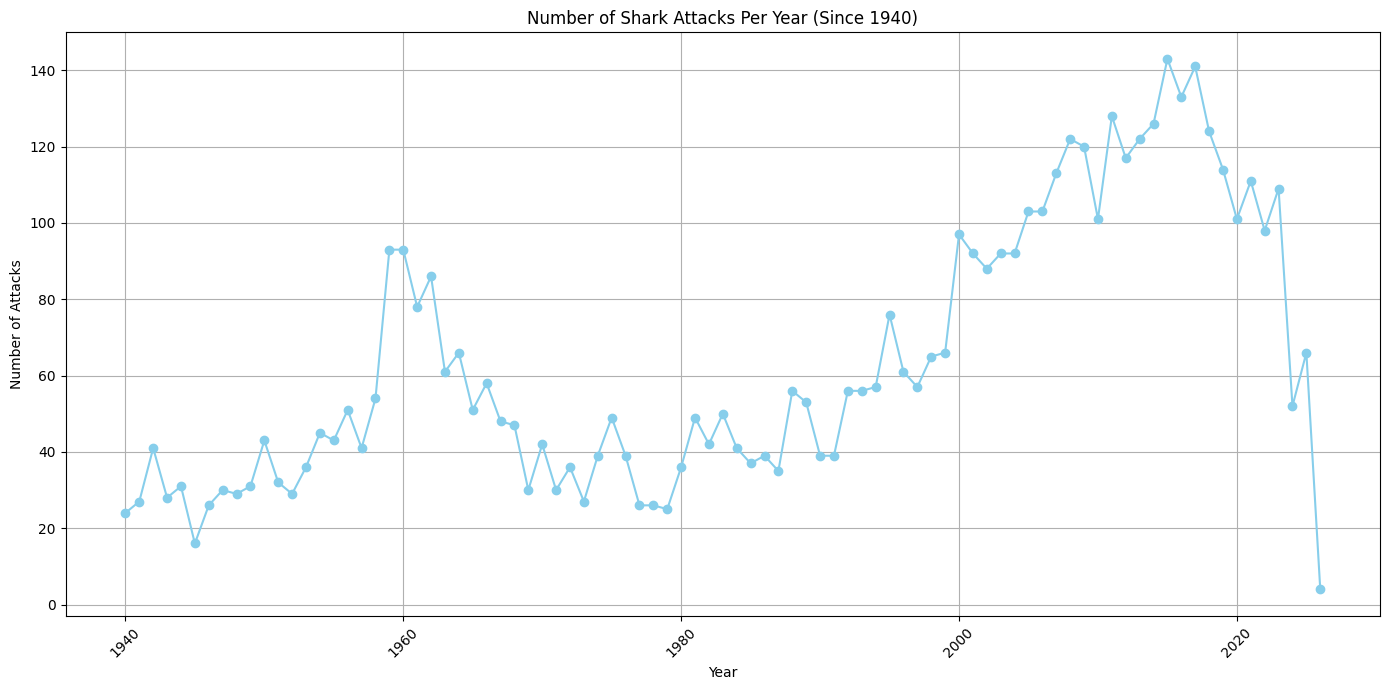

Number of missing values in 'Year_cleaned' after cleaning and filtering: 0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?

print("--- Original 'Year' column inspection ---")
print(df_sharks['Year'].value_counts(dropna=False).head(10))
print("Original 'Year' column info:\n")
df_sharks['Year'].info()

# Convert the 'Year' column to a numeric type, coercing errors to NaN
df_sharks['Year_cleaned'] = pd.to_numeric(df_sharks['Year'], errors='coerce')

# Convert to integer after coercing, handling potential floats (e.g., 2026.0)
df_sharks['Year_cleaned'] = df_sharks['Year_cleaned'].apply(lambda x: int(x) if pd.notna(x) else np.nan)

# Identify and handle unreasonable year values
current_year = 2026

df_sharks.loc[df_sharks['Year_cleaned'] > current_year, 'Year_cleaned'] = np.nan
df_sharks.loc[df_sharks['Year_cleaned'] == 0, 'Year_cleaned'] = np.nan # Replace 0 with NaN
df_sharks.loc[df_sharks['Year_cleaned'] < 1000, 'Year_cleaned'] = np.nan # Replace very early years with NaN (e.g., 0.0 in original data)

# Calculate and print the range of valid years after cleaning
min_year = df_sharks['Year_cleaned'].min()
max_year = df_sharks['Year_cleaned'].max()
print(f"\nRange of valid years after cleaning: {min_year} - {max_year}")

# Filter the DataFrame to include only rows where the 'Year' is 1940 or later.
df_sharks_filtered = df_sharks[df_sharks['Year_cleaned'] >= 1940].copy()

print(f"\nDataFrame shape after filtering for years >= 1940: {df_sharks_filtered.shape}")

# Group by 'Year' and count the number of attacks per year. Plot this data as a line chart.
attacks_per_year = df_sharks_filtered['Year_cleaned'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
attacks_per_year.plot(kind='line', marker='o', linestyle='-', color='skyblue')
plt.title('Number of Shark Attacks Per Year (Since 1940)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Check missing values after cleaning and filtering
missing_years_after_filter = df_sharks_filtered['Year_cleaned'].isnull().sum()
print(f"Number of missing values in 'Year_cleaned' after cleaning and filtering: {missing_years_after_filter}")

Based on the line plot showing the number of shark attacks per year since 1940:
The general trend appears to be an increase in the number of recorded shark attacks over time, particularly noticeable from the latter half of the 20th century into the 21st century. While there are fluctuations year-to-year, the overall trajectory shows a rise.

## Clean 'Age' Variable and Visualize Distribution


Age
NaN    1778
16       80
19       80
17       79
15       76
18       74
20       73
17       70
25       66
20       66
15       65
22       64
18       63
21       63
24       58
14       57
21       56
19       56
16       55
14       52
Name: count, dtype: int64
Original 'Age' column info:

<class 'pandas.core.series.Series'>
Index: 5529 entries, 0 to 5530
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
3751 non-null   object
dtypes: object(1)
memory usage: 86.4+ KB


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-421463852.py:16: SyntaxWarning: invalid escape sequence '\d'
  df_sharks_filtered['Age_cleaned'] = df_sharks_filtered['Age_cleaned'].str.extract('(\d+)', expand=False)


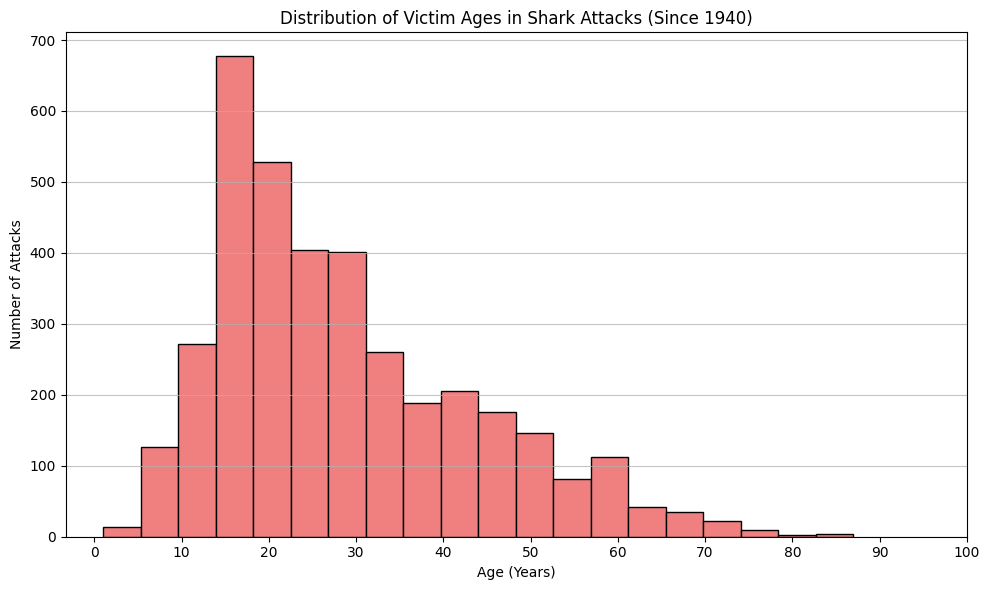

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 4. Clean the Age variable and make a histogram of the ages of the victims.

print(df_sharks_filtered['Age'].value_counts(dropna=False).head(20))
print("Original 'Age' column info:\n")
df_sharks_filtered['Age'].info()

# Convert the 'Age' column to a numeric type
df_sharks_filtered['Age_cleaned'] = df_sharks_filtered['Age'].astype(str).str.lower()

# Replace common non-numeric values that represent missing or invalid data

# Try to extract numbers first
df_sharks_filtered['Age_cleaned'] = df_sharks_filtered['Age_cleaned'].str.extract('(\d+)', expand=False)

# Convert to numeric, coercing errors. This will turn 'nan', '?', etc. into NaN.
df_sharks_filtered['Age_cleaned'] = pd.to_numeric(df_sharks_filtered['Age_cleaned'], errors='coerce')

# Ages typically range from 1 to around 100 for humans. Set values outside this range to NaN.
df_sharks_filtered.loc[(df_sharks_filtered['Age_cleaned'] <= 0) | (df_sharks_filtered['Age_cleaned'] > 100), 'Age_cleaned'] = np.nan


# 5. Create a histogram of the cleaned 'Age' variable
plt.figure(figsize=(10, 6))
plt.hist(df_sharks_filtered['Age_cleaned'].dropna(), bins=20, edgecolor='black', color='lightcoral')
plt.title('Distribution of Victim Ages in Shark Attacks (Since 1940)')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Attacks')
plt.grid(axis='y', alpha=0.75)
plt.xticks(np.arange(0, 101, 10))
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# 5. What proportion of victims are male?

print("--- Original 'Sex' column inspection ---")
print(df_sharks_filtered['Sex'].value_counts(dropna=False))
print("Original 'Sex' column info:\n")
df_sharks_filtered['Sex'].info()

# Standardize the 'Sex' column; Convert to uppercase string to handle variations like 'm', 'M '
df_sharks_filtered['Sex_cleaned'] = df_sharks_filtered['Sex'].astype(str).str.upper().str.strip()

# Replace known inconsistent entries with 'M', 'F', or 'Unknown'
df_sharks_filtered['Sex_cleaned'] = df_sharks_filtered['Sex_cleaned'].replace({
    'M ': 'M', 'N': 'Unknown', 'LLI': 'Unknown', 'M.': 'M', 'NEM': 'Unknown', 'FEMALE': 'F',
    'UNSPECIFIED': 'Unknown', 'MALE': 'M', '.': 'Unknown', 'INVALID': 'Unknown', 'T': 'Unknown',
    'F ': 'F' # Handle space for Female as well
})

# Map any remaining non-standard values (including original NaN which became 'NAN' string) to 'Unknown'
valid_genders = ['M', 'F']
df_sharks_filtered.loc[~df_sharks_filtered['Sex_cleaned'].isin(valid_genders), 'Sex_cleaned'] = 'Unknown'

# Calculate the total number of non-unknown victims (Male + Female).
known_gender_counts = df_sharks_filtered['Sex_cleaned'].value_counts()
total_known_victims = known_gender_counts.get('M', 0) + known_gender_counts.get('F', 0)

# Calculate the proportion of male victims among the known gender entries.
# Handle cases where total_known_victims might be zero to avoid division by zero
if total_known_victims > 0:
    proportion_male = known_gender_counts.get('M', 0) / total_known_victims
else:
    proportion_male = np.nan # Or 0, depending on desired handling of no known genders

# Print the cleaned value counts for the 'Sex' column and the calculated proportion of male victims.
print("\n--- Cleaned 'Sex_cleaned' column inspection ---")
print(df_sharks_filtered['Sex_cleaned'].value_counts(dropna=False))

print(f"\nProportion of male victims (among known genders): {proportion_male:.2f}")


--- Original 'Sex' column inspection ---
Sex
M        4345
F         722
NaN       452
M           4
F           2
 M          1
m           1
lli         1
M x 2       1
Name: count, dtype: int64
Original 'Sex' column info:

<class 'pandas.core.series.Series'>
Index: 5529 entries, 0 to 5530
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
5077 non-null   object
dtypes: object(1)
memory usage: 86.4+ KB

--- Cleaned 'Sex_cleaned' column inspection ---
Sex_cleaned
M          4351
F           724
Unknown     454
Name: count, dtype: int64

Proportion of male victims (among known genders): 0.86


In [ ]:
import numpy as np

# 6. Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

print("--- Original 'Type' column inspection ---")
print(df_sharks_filtered['Type'].value_counts(dropna=False))
print("Original 'Type' column info:\n")
df_sharks_filtered['Type'].info()

# Create a new column, 'Type_cleaned', by converting the 'Type' column to string type, then to lowercase, and stripping any whitespace.
df_sharks_filtered['Type_cleaned'] = df_sharks_filtered['Type'].astype(str).str.lower().str.strip()

unprovoked_terms = ['unprovoked', 'invalid']
provoked_terms = ['provoked']
df_sharks_filtered['Type_cleaned'] = 'Unknown'

# Apply standardization
df_sharks_filtered.loc[df_sharks_filtered['Type'].astype(str).str.lower().str.strip().isin(unprovoked_terms), 'Type_cleaned'] = 'Unprovoked'
df_sharks_filtered.loc[df_sharks_filtered['Type'].astype(str).str.lower().str.strip().isin(provoked_terms), 'Type_cleaned'] = 'Provoked'

# Handle NaN values as 'Unknown'
df_sharks_filtered.loc[df_sharks_filtered['Type'].isnull(), 'Type_cleaned'] = 'Unknown'

# Print the value counts of the cleaned 'Type_cleaned' column to verify the standardization.
print("\n--- Cleaned 'Type_cleaned' column inspection ---")
print(df_sharks_filtered['Type_cleaned'].value_counts(dropna=False))

# Calculate the proportion of 'Unprovoked' attacks among all attacks with a known type.
known_type_counts = df_sharks_filtered['Type_cleaned'].value_counts()
total_known_attacks = known_type_counts.get('Provoked', 0) + known_type_counts.get('Unprovoked', 0)

if total_known_attacks > 0:
    proportion_unprovoked = known_type_counts.get('Unprovoked', 0) / total_known_attacks
else:
    proportion_unprovoked = np.nan # Or 0, if no known attacks

# Print the calculated proportion of unprovoked attacks.
print(f"\nProportion of unprovoked attacks (among known types): {proportion_unprovoked:.2f}")

--- Original 'Type' column inspection ---
Type
Unprovoked             4117
Provoked                520
Invalid                 402
Watercraft              280
Sea Disaster            156
Questionable             26
NaN                      14
Boat                      7
 Provoked                 2
unprovoked                1
Unconfirmed               1
?                         1
Unverified                1
Under investigation       1
Name: count, dtype: int64
Original 'Type' column info:

<class 'pandas.core.series.Series'>
Index: 5529 entries, 0 to 5530
Series name: Type
Non-Null Count  Dtype 
--------------  ----- 
5515 non-null   object
dtypes: object(1)
memory usage: 86.4+ KB

--- Cleaned 'Type_cleaned' column inspection ---
Type_cleaned
Unprovoked    4520
Provoked       522
Unknown        487
Name: count, dtype: int64

Proportion of unprovoked attacks (among known types): 0.90


In [ ]:
import numpy as np

# 7. Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

target_fatal_column = 'Fatal Y/N'

# Inspect the identified fatal column
print(f"--- Original '{target_fatal_column}' column inspection ---")
print(df_sharks_filtered[target_fatal_column].value_counts(dropna=False))
print(f"Original '{target_fatal_column}' column info:\n")
df_sharks_filtered[target_fatal_column].info()

# Create a new column, 'Fatal_cleaned'
df_sharks_filtered['Fatal_cleaned'] = df_sharks_filtered[target_fatal_column].astype(str).str.lower().str.strip()

# Standarize: Map entries that indicate a fatality (e.g., 'y', 'yes') to 'Y'.
y_values = ['y', 'yes']
df_sharks_filtered.loc[df_sharks_filtered['Fatal_cleaned'].isin(y_values), 'Fatal_cleaned'] = 'Y'

# Map entries that indicate no fatality (e.g., 'n', 'no') to 'N'.
n_values = ['n', 'no']
df_sharks_filtered.loc[df_sharks_filtered['Fatal_cleaned'].isin(n_values), 'Fatal_cleaned'] = 'N'

# Map any other values, including NaN (which will appear as 'nan' after string conversion), 'f', or '?' to 'Unknown'.
df_sharks_filtered.loc[df_sharks_filtered['Fatal_cleaned'].isin(['f', '?']), 'Fatal_cleaned'] = 'Unknown'

# Map anything not 'Y' or 'N' to 'Unknown'. This will catch 'nan' and other unhandled strings.
df_sharks_filtered.loc[~df_sharks_filtered['Fatal_cleaned'].isin(['Y', 'N']), 'Fatal_cleaned'] = 'Unknown'

# Print the value counts of the new 'Fatal_cleaned' column to verify the standardization.
print("\n--- Cleaned 'Fatal_cleaned' column inspection ---")
print(df_sharks_filtered['Fatal_cleaned'].value_counts(dropna=False))

--- Original 'Fatal Y/N' column inspection ---
Fatal Y/N
N          4231
Y           828
NaN         406
UNKNOWN      45
 N            7
F             5
M             3
Nq            1
n             1
2017          1
Y x 2         1
Name: count, dtype: int64
Original 'Fatal Y/N' column info:

<class 'pandas.core.series.Series'>
Index: 5529 entries, 0 to 5530
Series name: Fatal Y/N
Non-Null Count  Dtype 
--------------  ----- 
5123 non-null   object
dtypes: object(1)
memory usage: 86.4+ KB

--- Cleaned 'Fatal_cleaned' column inspection ---
Fatal_cleaned
N          4239
Y           828
Unknown     462
Name: count, dtype: int64


In [ ]:
import numpy as np

# 8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?

print("\n--- Unprovoked Attacks: Men vs. Women ---")
# Filter df_sharks_filtered for rows where Type_cleaned is 'Unprovoked' and Sex_cleaned is either 'M' or 'F'.
unprovoked_attacks_known_gender = df_sharks_filtered[
    (df_sharks_filtered['Type_cleaned'] == 'Unprovoked') &
    (df_sharks_filtered['Sex_cleaned'].isin(['M', 'F']))
].copy()

# Calculate the value counts for Sex_cleaned within this filtered subset.
sex_counts_unprovoked = unprovoked_attacks_known_gender['Sex_cleaned'].value_counts()
print("Gender counts in unprovoked attacks (known gender only):\n", sex_counts_unprovoked)

# Compute the proportion of male and female victims among these unprovoked attacks.
total_unprovoked_known_gender = sex_counts_unprovoked.sum()

if total_unprovoked_known_gender > 0:
    proportion_male_unprovoked = sex_counts_unprovoked.get('M', 0) / total_unprovoked_known_gender
    proportion_female_unprovoked = sex_counts_unprovoked.get('F', 0) / total_unprovoked_known_gender
    print(f"Proportion of male victims in unprovoked attacks: {proportion_male_unprovoked:.2f}")
    print(f"Proportion of female victims in unprovoked attacks: {proportion_female_unprovoked:.2f}")
else:
    print("No unprovoked attacks with known gender found.")


# Fatality based on provoked/unprovoked attacks
print("\n--- Fatality: Provoked vs. Unprovoked Attacks ---")
# a. Create a cross-tabulation of Type_cleaned and Fatal_cleaned
# Exclude 'Unknown' from both columns for this specific analysis
filtered_for_crosstab_type_fatal = df_sharks_filtered[
    (df_sharks_filtered['Type_cleaned'].isin(['Provoked', 'Unprovoked'])) &
    (df_sharks_filtered['Fatal_cleaned'].isin(['Y', 'N']))
]

crosstab_type_fatal = pd.crosstab(
    filtered_for_crosstab_type_fatal['Type_cleaned'],
    filtered_for_crosstab_type_fatal['Fatal_cleaned']
)
print("Cross-tabulation (Type vs. Fatal):\n", crosstab_type_fatal)

# Calculate the fatality rate for 'Provoked' attacks and for 'Unprovoked' attacks.
# For 'Provoked' attacks:
provoked_fatal_count = crosstab_type_fatal.loc['Provoked', 'Y']
provoked_total_count = crosstab_type_fatal.loc['Provoked'].sum()
fatality_rate_provoked = provoked_fatal_count / provoked_total_count if provoked_total_count > 0 else 0
print(f"Fatality rate for Provoked attacks: {fatality_rate_provoked:.2%}")

# For 'Unprovoked' attacks:
unprovoked_fatal_count = crosstab_type_fatal.loc['Unprovoked', 'Y']
unprovoked_total_count = crosstab_type_fatal.loc['Unprovoked'].sum()
fatality_rate_unprovoked = unprovoked_fatal_count / unprovoked_total_count if unprovoked_total_count > 0 else 0
print(f"Fatality rate for Unprovoked attacks: {fatality_rate_unprovoked:.2%}")


# Fatality based on victim's sex
print("\n--- Fatality: Male vs. Female Victims ---")
# a. Create a cross-tabulation of Sex_cleaned and Fatal_cleaned
# Exclude 'Unknown' from both columns for this specific analysis
filtered_for_crosstab_sex_fatal = df_sharks_filtered[
    (df_sharks_filtered['Sex_cleaned'].isin(['M', 'F'])) &
    (df_sharks_filtered['Fatal_cleaned'].isin(['Y', 'N']))
]

crosstab_sex_fatal = pd.crosstab(
    filtered_for_crosstab_sex_fatal['Sex_cleaned'],
    filtered_for_crosstab_sex_fatal['Fatal_cleaned']
)
print("Cross-tabulation (Sex vs. Fatal):\n", crosstab_sex_fatal)

# Calculate the fatality rate for male victims and for female victims.
# For Male victims:
male_fatal_count = crosstab_sex_fatal.loc['M', 'Y']
male_total_count = crosstab_sex_fatal.loc['M'].sum()
fatality_rate_male = male_fatal_count / male_total_count if male_total_count > 0 else 0
print(f"Fatality rate for Male victims: {fatality_rate_male:.2%}")

# For Female victims:
female_fatal_count = crosstab_sex_fatal.loc['F', 'Y']
female_total_count = crosstab_sex_fatal.loc['F'].sum()
fatality_rate_female = female_fatal_count / female_total_count if female_total_count > 0 else 0
print(f"Fatality rate for Female victims: {fatality_rate_female:.2%}")



--- Unprovoked Attacks: Men vs. Women ---
Gender counts in unprovoked attacks (known gender only):
 Sex_cleaned
M    3651
F     674
Name: count, dtype: int64
Proportion of male victims in unprovoked attacks: 0.84
Proportion of female victims in unprovoked attacks: 0.16

--- Fatality: Provoked vs. Unprovoked Attacks ---
Cross-tabulation (Type vs. Fatal):
 Fatal_cleaned     N    Y
Type_cleaned            
Provoked        500   13
Unprovoked     3389  699
Fatality rate for Provoked attacks: 2.53%
Fatality rate for Unprovoked attacks: 17.10%

--- Fatality: Male vs. Female Victims ---
Cross-tabulation (Sex vs. Fatal):
 Fatal_cleaned     N    Y
Sex_cleaned             
F               573   92
M              3368  660
Fatality rate for Male victims: 16.39%
Fatality rate for Female victims: 13.83%

--- Summary of Findings and Feelings About Sharks ---
**Are sharks more likely to launch unprovoked attacks on men or women?**
Among unprovoked attacks with known gender, 84.42% were on men and 15

Are sharks more likely to launch unprovoked attacks on men or women?
- Among unprovoked attacks with known gender, 84.42% were on men and 15.58% were on women. This suggests that men are significantly more likely to be victims of unprovoked shark attacks than women.

Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
- Provoked attacks had a fatality rate of 2.53%, while unprovoked attacks had a fatality rate of 17.10%. Unprovoked attacks appear to be slightly more likely to be fatal than provoked attacks, though both rates are relatively low.

Is it more or less likely to be fatal when the victim is male or female?
- The fatality rate for male victims was 16.39%, and for female victims was 13.83%. Attacks on men appear to be slightly more likely to be fatal than attacks on women.

How do you feel about sharks?
- These statistics highlight that while shark attacks, especially fatal ones, are rare events, they do occur. Personally, whether shark attacks are rare or not, I am forever terrified of them.

In [ ]:
import numpy as np

# 9. What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)

# Inspect the 'Species' column
print("--- Original 'Species ' column inspection ---")
print(df_sharks_filtered['Species '].value_counts(dropna=False).head(20))
print("Original 'Species ' column info:\n")
df_sharks_filtered['Species '].info()

# Convert 'Species' to string type and lowercase for robust matching
species_lower = df_sharks_filtered['Species '].astype(str).str.lower()

# Identify attacks by white sharks using str.split()
white_shark_count = 0
for entry in species_lower:
    if pd.isna(entry): # Handle NaN values
        continue
    words = entry.split()
    # Check for 'white shark' or 'great white' in the split words
    # More robust check: look for 'white' and 'shark' or 'great' and 'white'
    if ('white' in words and 'shark' in words) or ('great' in words and 'white' in words):
        white_shark_count += 1

white_shark_attacks_count = white_shark_count

# Calculate the total number of attacks in the filtered dataset.
total_attacks = len(df_sharks_filtered)

# Number of attacks where species is not NaN
total_attacks_with_species_info = species_lower.dropna().count()

# Calculate the proportion of attacks by white sharks
if total_attacks > 0:
    proportion_white_shark_all = white_shark_attacks_count / total_attacks
    print(f"\nProportion of attacks by white sharks (out of all attacks): {proportion_white_shark_all:.2%}")
else:
    proportion_white_shark_all = 0
    print("No attacks recorded in the filtered dataset.")

# Calculate proportion relative to attacks where species info is not missing
if total_attacks_with_species_info > 0:
    proportion_white_shark_known = white_shark_attacks_count / total_attacks_with_species_info
    print(f"Proportion of attacks by white sharks (out of attacks with known species): {proportion_white_shark_known:.2%}")
else:
    proportion_white_shark_known = 0
    print("No attacks with known species information in the filtered dataset.")

--- Original 'Species ' column inspection ---
Species 
NaN                                                   2070
White shark                                            180
Shark involvement prior to death was not confirmed      98
Shark involvement not confirmed                         86
Invalid                                                 78
Tiger shark                                             75
Bull shark                                              64
4' shark                                                41
6' shark                                                37
Questionable incident                                   33
1.8 m [6'] shark                                        31
Wobbegong shark                                         27
1.5 m [5'] shark                                        26
5' shark                                                25
1.2 m [4'] shark                                        25
3' shark                                                25
4

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  
  - The paper is about data tidying: an important aspect of cleaning data in preparation for further analysis. Tidy datasets are composed of variables as columns, observations as rows, and observational units as tables. The structure of tidy datasets helps organize messy datasets and develop tools for data analysis.

  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  - The “tidy data standard” is intended to provide an easy way to organize data values within a dataset while facilitating initial data exploration. It also aids in the development of data analysis tools (tidy tools) by simplifying the need of focusing on logistics of data with tidy data.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  - The  sentence, "Like families, tidy datasets are all alike but every messy dataset is messy in its own way," means that messy datasets can be cleaned to meet the same “tidy data standard” but can also vary in different ways (e.g., size and variable types). The sentence “"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general," means a dataset’s structure and semantics could be easily identified but describing them could be difficult.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  - Values: Usually either numbers (if quantitative) or strings (if qualitative)
- Variables: Contains all values that measure the same underlying attribute (like height, temperature, duration) across units
- Observations: Contains all values measured on the same unit (like a person, or a day, or a race) across attributes

5. How is "Tidy Data" defined in section 2.3?

  - Tidy data is defined as a standard way of mapping the meaning of a dataset to its structure. In tidy data:
  - Each variables forms a column
- Each observation forms a row
- Each type of observational unit forms a table


6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  - Column headers are values, not variable names
- Multiple variables are stored in one column
- Variables are stored in both rows and columns
- Multiple types of observational units are stored in the same table
- A single observational unit is stored in multiple tables
- The data in Table 4 is messy, because it is missing the variable frequency. Melting a dataset is turning the columns into rows.



7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

- Table 11 is messy, because it has variables in both columns (id, year, month) and rows (tmin, tmax). Additionally, the element column is not a variable, as it stores the names of variables. Table 12 is “molten”, because it melted colvars id, year, month, and the column that contains variable names, element.

8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

- The chicken-and-egg problem is that if tidy data is only useful as the tools that work with it, then tidy tools will be inextricably linked to tidy data. This makes it easy to get stuck in a local maxima where independently changing data structures or data tools will not improve workflow. Wickham hopes that others will build on the tidy data framework to help break out of the local maxima and develop better data storage strategies and tools. He also hopes to use methodologies from human-centered feels to improve the understanding of the cognitive side and data analysis and the ability to design appropriate tools.
